# HW 4 #
## Due: Nov 5th 11:59 PM ##
## Total points: 80 ##

## Name(s) and EID(s):     

#### Manasa Maganti: mm226524

#### Varsha Manju Jayakumar: vm26476

If you prefer, you can work in groups of two. **Please note that only one student per team needs to submit the assignment but make sure to include both students' names and UT EIDs.**  

For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

Please make sure your code runs and the graphs and figures are displayed in your notebook and PDF before submitting.

# Q1. (10 points) Binary Classifier

Consider the Covid-test scenario, where we have a test output Y = $\{0,1\}$ and the true value H = $\{0,1\}$. We also know the sensitivity (ie, $\mathbb{P} (Y=1|H=1)$) to be $87.5\%$ and specificity (ie, $\mathbb{P} (Y=0|H=0)$) to be $97.5\%$. However, the prevalence of Covid in the area of interest (ie, the prior) $\mathbb{P} (H=1)$ is not precisely known, and hence the below question:

a. (5 points) Calculate $\mathbb{P} (H=1|Y=1)$ and $\mathbb{P} (H=1|Y=0)$ for different values of prior $\mathbb{P} (H=1)$ = $\{0.01, 0.1, 0.2, 0.5\}$. Plot them w.r.t the different values of prior.

b. (5 points) There is a cheaper test, with same sensitivity (ie, detects Covid +ve at the same rate) but with a reduced specificity of $90\%$(ie, tells healthy people that they are +ve, with a higher rate). Hence plot the same chart as in part a. with the new value of specificity.



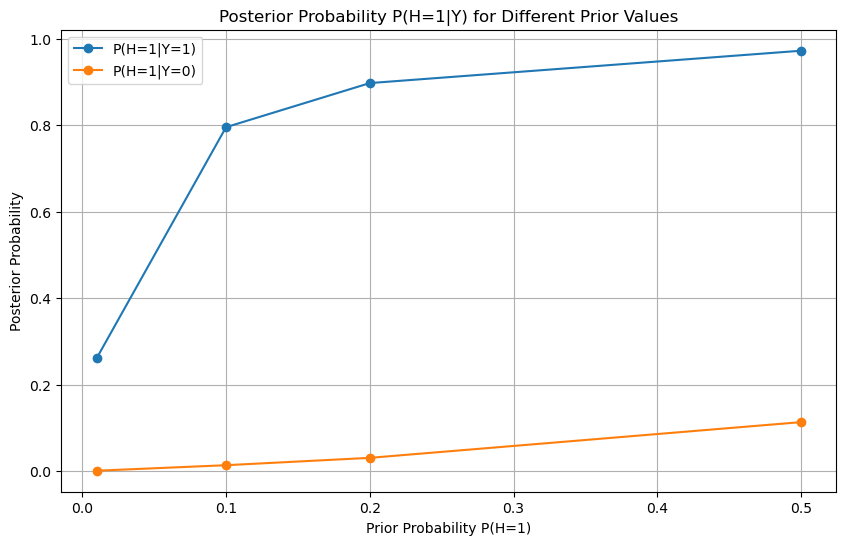

In [1]:
# Q1 a
import numpy as np
import matplotlib.pyplot as plt

# Given values
sensitivity = 0.875  # P(Y=1|H=1)
specificity = 0.975  # P(Y=0|H=0)
prior_values = [0.01, 0.1, 0.2, 0.5]  # P(H=1) values to test

# Initialize lists to store P(H=1|Y=1) and P(H=1|Y=0) for each prior
posterior_positive = []
posterior_negative = []

# Calculating P(H=1|Y=1) and P(H=1|Y=0) using Bayes' theorem
for prior in prior_values:
    # P(H=1|Y=1) = (P(Y=1|H=1) * P(H=1)) / P(Y=1)
    # P(Y=1) = P(Y=1|H=1) * P(H=1) + P(Y=1|H=0) * P(H=0)
    p_y1 = sensitivity * prior + (1 - specificity) * (1 - prior)
    p_h1_given_y1 = (sensitivity * prior) / p_y1
    posterior_positive.append(p_h1_given_y1)

    # P(H=1|Y=0) = (P(Y=0|H=1) * P(H=1)) / P(Y=0)
    # P(Y=0) = P(Y=0|H=1) * P(H=1) + P(Y=0|H=0) * P(H=0)
    p_y0 = (1 - sensitivity) * prior + specificity * (1 - prior)
    p_h1_given_y0 = ((1 - sensitivity) * prior) / p_y0
    posterior_negative.append(p_h1_given_y0)

# Plotting results
plt.figure(figsize=(10, 6))
plt.plot(prior_values, posterior_positive, marker='o', label="P(H=1|Y=1)")
plt.plot(prior_values, posterior_negative, marker='o', label="P(H=1|Y=0)")
plt.xlabel("Prior Probability P(H=1)")
plt.ylabel("Posterior Probability")
plt.title("Posterior Probability P(H=1|Y) for Different Prior Values")
plt.legend()
plt.grid(True)
plt.show()


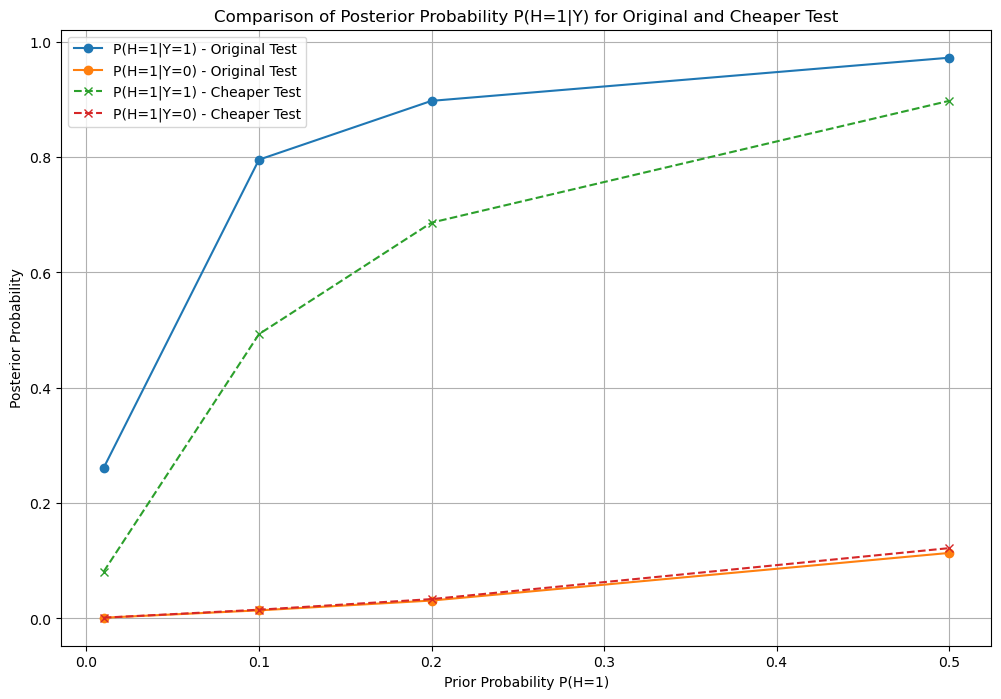

In [2]:
#Q1 b
# Updated specificity for the cheaper test
specificity_cheaper_test = 0.90

# Recalculate P(H=1|Y=1) and P(H=1|Y=0) for the cheaper test with reduced specificity
posterior_positive_cheaper = []
posterior_negative_cheaper = []

for prior in prior_values:
    # P(H=1|Y=1) with cheaper test
    p_y1_cheaper = sensitivity * prior + (1 - specificity_cheaper_test) * (1 - prior)
    p_h1_given_y1_cheaper = (sensitivity * prior) / p_y1_cheaper
    posterior_positive_cheaper.append(p_h1_given_y1_cheaper)

    # P(H=1|Y=0) with cheaper test
    p_y0_cheaper = (1 - sensitivity) * prior + specificity_cheaper_test * (1 - prior)
    p_h1_given_y0_cheaper = ((1 - sensitivity) * prior) / p_y0_cheaper
    posterior_negative_cheaper.append(p_h1_given_y0_cheaper)

# Plotting the results for both original and cheaper test
plt.figure(figsize=(12, 8))
plt.plot(prior_values, posterior_positive, marker='o', label="P(H=1|Y=1) - Original Test")
plt.plot(prior_values, posterior_negative, marker='o', label="P(H=1|Y=0) - Original Test")
plt.plot(prior_values, posterior_positive_cheaper, marker='x', linestyle='--', label="P(H=1|Y=1) - Cheaper Test")
plt.plot(prior_values, posterior_negative_cheaper, marker='x', linestyle='--', label="P(H=1|Y=0) - Cheaper Test")
plt.xlabel("Prior Probability P(H=1)")
plt.ylabel("Posterior Probability")
plt.title("Comparison of Posterior Probability P(H=1|Y) for Original and Cheaper Test")
plt.legend()
plt.grid(True)
plt.show()


# Q2. Classification with Skorch (25 points)

In this question we will train and evaluate a simple neural network on a classification dataset using the skorch library. skorch is a scikit-learn compatible neural network library that wraps PyTorch. For more details on how to use the library see [here](https://github.com/skorch-dev/skorch). For this question, we will use a phishing dataset which consists of 11430 URLs with 87 extracted features. The dataset is already preprocessed and provided to you in the file `phishing_dataset.pt`. The dataset is balanced i.e. it contains 50% phishing and 50% legitimate URLs.


In [3]:
# !pip install skorch mpld3

In [1]:
# !pip install torch

In [5]:
import torch
import numpy as np
import pandas as pd
from torch import nn
from skorch import NeuralNetClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, auc, RocCurveDisplay, ConfusionMatrixDisplay, accuracy_score, classification_report
import matplotlib.pyplot as plt

In [39]:
# from google.colab import files
# uploaded = files.upload()

In [7]:
X_train, y_train, X_train_imbalanced, y_train_imbalanced, X_test, y_test, X_test_imbalanced, y_test_imbalanced = torch.load('phishing_dataset_final.pt')

/var/folders/80/thsrr5hx3vz86sq3qf9p6gjm0000gn/T/ipykernel_58110/3703922841.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  X_train, y_train, X_train_imbalanced, y_train

## Part 1. (9 points)

In this part we will define our neural network. When building our network we will take as input the following:
1. inp_size: the number of input features
2. hidden_sizes: list of the size of each hidden layer in the network. Note that this does not include the size of the input and output layer. Eg: `[16, 8]` in which case your NN will look like: input_layer -> hidden_layer_1 (size 16) -> hidden_layer_2 (size 8) -> output_layer.
3. num_classes: the number of output classes which is equivalent to the size of the output layer. In our example, we only have 2 classes (phishing, non-phishing).
4. nonlin: the activation function. Eg: `torch.nn.ReLU()`.

The above arguments will be used to initialize our neural network. Notice that we want to be able to initialize an arbitrary size network specified by the hidden_sizes. To do this you must first initialize a `nn.ModuleList()` and append your layer followed by the activation for each specified size. You can refer to [this](https://pytorch.org/docs/stable/generated/torch.nn.ModuleList.html) for more help.

You must also define a `forward(X)` function which handles the forward pass of your network. Here `X` is your input and you must return the [softmax](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html) output tensor from your network in this function.

In [9]:
class MyModule(nn.Module):
    def __init__(self, inp_size, hidden_sizes, num_classes=2, nonlin=nn.ReLU()):
        super().__init__()
        # define your hidden layers (self.hidden) as a nn.ModuleList() and append your nn.Linear layers based on the hidden_sizes
        ##  START CODE  ##
        self.hidden = nn.ModuleList()        ##  END CODE  ##
        # Define hidden layers
        layer_sizes = [inp_size] + hidden_sizes
        for i in range(len(hidden_sizes)):
            self.hidden.append(nn.Linear(layer_sizes[i], layer_sizes[i+1]))
            self.hidden.append(nonlin)

        # Output layer
        self.output_layer = nn.Linear(hidden_sizes[-1], num_classes)

        # Define softmax
        # define softmax
        ##  START CODE  ## (1 line of code)
        self.softmax = nn.Softmax(dim=1)
        ##  END CODE  ##

    def forward(self, X):
        # calculate the output from your hidden layers
        # Hint: if your hidden layers are in the form of nn.ModuleList(),
        #       you must write a for loop to do a forward pass on all layers in the list
        ##  START CODE  ##
        for layer in self.hidden:
            X = layer(X)

        # Output layer
        X = self.output_layer(X)
        ##  END CODE  ##

        # calculate softmax on the output
        ##  START CODE  ## (1 line of code)
        out = self.softmax(X)
        ##  END CODE  ##
        return out

## Part 2. (5 points)

In this part we will train and evaluate the neural network on our dataset. Use `X_train` and `y_train` tensors to train the model. Use `X_test` and `y_test` tensors to evaluate.  **To get full credit you must obtain an accuracy of 95% or more on the test set.** You must use GridSearchCV from sklearn to search the best hyperparameters. Search over atleast 2 values (can be anything of your choice) of the following hyperparams:
1. Learning rate
2. Number of training epochs
3. hidden_sizes which is the input to your neural network you defined above
4. nonlin which is the activation function input to your neural network you defined above

Finally, use sklearn's ConfusionMatrixDisplay and RocCurveDisplay to caluclate and display the confusion matrix and ROC on the test set for the best model obtained using the grid search. Also use classification_report to calculate and print the precision and recall values of the positive and negative label.

In [11]:
# define a NeuralNetClassifier() with batch size 256, torch.optim.Adam optimizer and torch.nn.CrossEntropyLoss as the criterion
# IMPORTANT: also use iterator_train__shuffle=True to shuffle the training data during the training process
##  START CODE  ##
net = NeuralNetClassifier(
    MyModule,
    module__inp_size=X_train.shape[1],  # Set input size based on feature count
    module__num_classes=2,              # Set number of output classes
    batch_size=256,
    optimizer=torch.optim.Adam,
    criterion=torch.nn.CrossEntropyLoss,
    iterator_train__shuffle=True
)
##  END CODE  ##

# deactivate skorch-internal train-valid split and verbose logging
net.set_params(train_split=False, verbose=0)

# define the parameters you want to search over as a dict
##  START CODE  ##
params = {
    'lr': [0.001, 0.01],
    'max_epochs': [20, 50],
    'module__hidden_sizes': [[16, 8], [32, 16]],
    'module__nonlin': [torch.nn.ReLU(), torch.nn.Tanh()]
}
##  END CODE  ##

# define your GridSearchCV()
# IMPORTANT: use cv=3, scoring='accuracy' (to obtain best model based on accuracy)
# and refit=True (to retrain the model using the best hyperparams for later use i.e. evaluation).
##  START CODE  ## (1 line of code)
# Define GridSearchCV with error_score='raise'
gs = GridSearchCV(net, params, cv=3, scoring='accuracy', refit=True, error_score='raise')
##  END CODE  ##

In [13]:
# train your model
##  START CODE  ## (1 line of code)
gs.fit(X_train, y_train)

##  END CODE  ##

# print best params
print("best score: {:.3f}, best params: {}".format(gs.best_score_, gs.best_params_))

best score: 0.955, best params: {'lr': 0.001, 'max_epochs': 50, 'module__hidden_sizes': [32, 16], 'module__nonlin': ReLU()}


Best Accuracy on Test:  0.9555633310006998
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1433
           1       0.95      0.96      0.96      1425

    accuracy                           0.96      2858
   macro avg       0.96      0.96      0.96      2858
weighted avg       0.96      0.96      0.96      2858



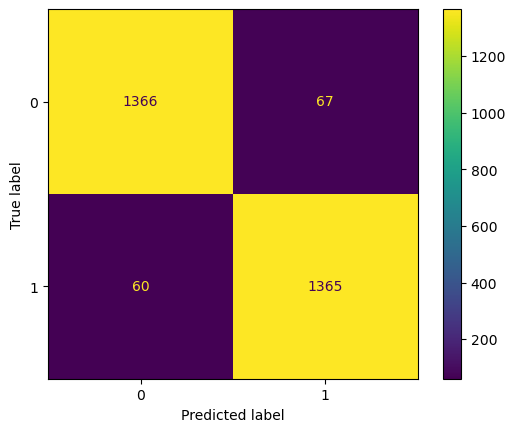

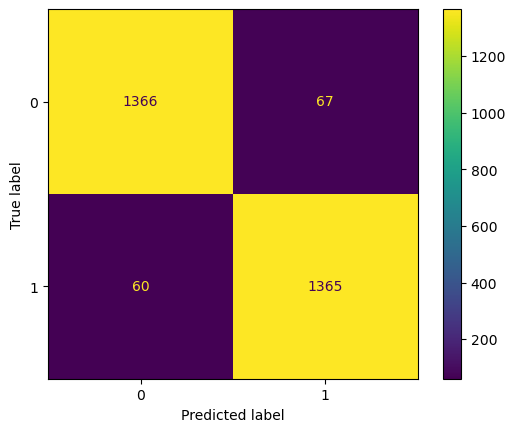

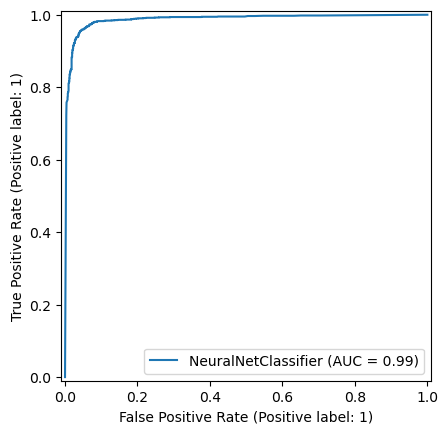

In [15]:
# Get the best model from your GridSearchCV object.
##  START CODE  ## (1 line of code)
net = gs.best_estimator_
##  END CODE  ##

# get predictions on the test data
##  START CODE  ## (1 line of code)
y_pred_test = net.predict(X_test)
##  END CODE  ##

# calculate accuracy and print
print("Best Accuracy on Test: ", accuracy_score(y_test, y_pred_test))

# calculate confusion matrix and use ConfusionMatrixDisplay to display the matrix
##  START CODE  ##
confusion_mat = ConfusionMatrixDisplay.from_estimator(net, X_test, y_test)
confusion_mat.plot()##  END CODE  ##

# use RocCurveDisplay to display the roc curve and AUC
##  START CODE  ## (1 line of code)
RocCurveDisplay.from_estimator(net, X_test, y_test)

##  END CODE  ##

# print sklearn's classification_report which consists of precision and recall for both labels
##  START CODE  ## (1 line of code)
print(classification_report(y_test, y_pred_test))

##  END CODE  ##

## Part 3. (5 points)

In this part we will deal with a more realistic scenario. In reality most emails we receieve are non-phishing legitimate emails. Hence in a real world dataset, we can expect that there will be way more datapoints with a negative label than positive. Hence the dataset will be imbalanced.

Use `X_train_imbalanced` and `y_train_imbalanced` tensors to train the model. Use `X_test_imbalanced` and `y_test_imbalanced` tensors to evaluate.  **To get full credit you must obtain an accuracy of 95% or more on the imbalanced test set.** You must use GridSearchCV from sklearn to search the best hyperparameters. Search over atleast 2 values (can be anything of your choice) of the following hyperparams:
1. Learning rate
2. Number of training epochs
3. hidden_sizes which is the input to your neural network you defined above
4. nonlin which is the activation function input to your neural network you defined above

Finally, use sklearn's ConfusionMatrixDisplay and RocCurveDisplay to caluclate and display the confusion matrix and ROC on the imbalanced test set for the best model obtained using the grid search. Also use classification_report to calculate and print the precision and recall values of the positive and negative label.

In [17]:
# define a NeuralNetClassifier() with batch size 256, torch.optim.Adam optimizer and torch.nn.CrossEntropyLoss as the criterion
# IMPORTANT: also use iterator_train__shuffle=True to shuffle the training data during the training process
##  START CODE  ##
net_imbalanced = NeuralNetClassifier(
    MyModule,
    module__inp_size=X_train_imbalanced.shape[1],  # Input size based on training data features
    module__num_classes=2,                         # Assuming binary classification (phishing, non-phishing)
    batch_size=256,
    optimizer=torch.optim.Adam,
    criterion=torch.nn.CrossEntropyLoss,
    iterator_train__shuffle=True
)
##  END CODE  ##

# deactivate skorch-internal train-valid split and verbose logging
net_imbalanced.set_params(train_split=False, verbose=0)

# define the parameters you want to search over as a dict
##  START CODE  ##
params = {
    'lr': [0.001, 0.01],
    'max_epochs': [20, 50],
    'module__hidden_sizes': [[16, 8], [32, 16]],
    'module__nonlin': [torch.nn.ReLU(), torch.nn.Tanh()]
}
##  END CODE  ##

# define your GridSearchCV()
# IMPORTANT: use cv=3, scoring='accuracy' (to obtain best model based on accuracy)
# and refit=True (to retrain the model using the best hyperparams for later use i.e. evaluation).
##  START CODE  ## (1 line of code)
gs_imbalanced = GridSearchCV(net_imbalanced, params, cv=3, scoring='accuracy', refit=True)
##  END CODE  ##

In [19]:
# train your model on the imbalanced train dataset
##  START CODE  ## (1 line of code)
gs_imbalanced.fit(X_train_imbalanced, y_train_imbalanced)

##  END CODE  ##

# print best params
print("best score: {:.3f}, best params: {}".format(gs_imbalanced.best_score_, gs_imbalanced.best_params_))

best score: 0.959, best params: {'lr': 0.01, 'max_epochs': 50, 'module__hidden_sizes': [32, 16], 'module__nonlin': ReLU()}


Best Accuracy on Imbalanced Test:  0.9549266247379455
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1433
         1.0       0.93      0.88      0.91       475

    accuracy                           0.95      1908
   macro avg       0.95      0.93      0.94      1908
weighted avg       0.95      0.95      0.95      1908



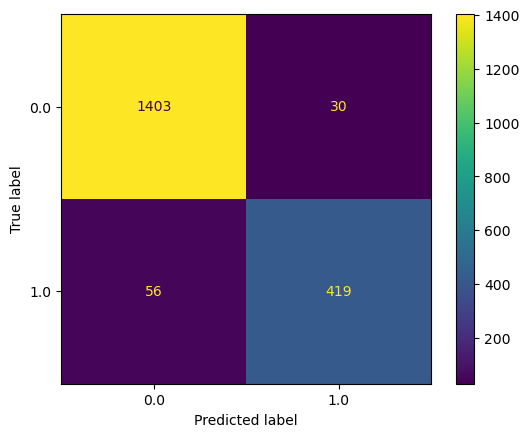

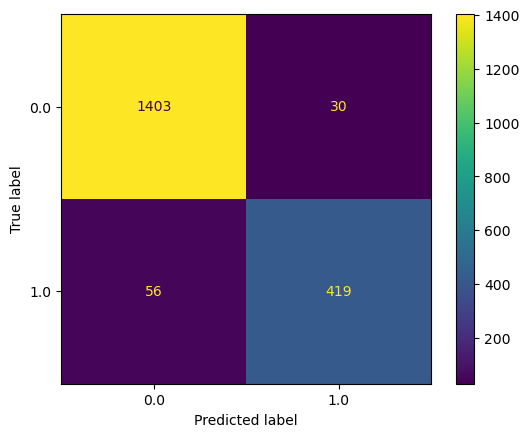

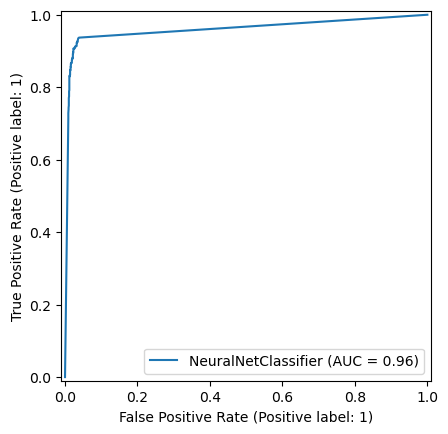

In [21]:
# Get the best model from your GridSearchCV object.
##  START CODE  ## (1 line of code)
net_imbalanced = gs_imbalanced.best_estimator_
##  END CODE  ##

# get predictions on the imbalanced test data
##  START CODE  ## (1 line of code)
y_pred_test = net_imbalanced.predict(X_test_imbalanced)
##  END CODE  ##

# calculate accuracy and print
print("Best Accuracy on Imbalanced Test: ", accuracy_score(y_test_imbalanced, y_pred_test))

# calculate confusion matrix and use ConfusionMatrixDisplay to display the matrix
##  START CODE  ##
confusion_mat = ConfusionMatrixDisplay.from_estimator(net_imbalanced, X_test_imbalanced, y_test_imbalanced)
confusion_mat.plot()
##  END CODE  ##

# use RocCurveDisplay to display the roc curve and AUC
##  START CODE  ## (1 line of code)
RocCurveDisplay.from_estimator(net_imbalanced, X_test_imbalanced, y_test_imbalanced)

##  END CODE  ##

# print sklearn's classification_report which consists of precision and recall for both labels
##  START CODE  ## (1 line of code)
print(classification_report(y_test_imbalanced, y_pred_test))

##  END CODE  ##

In [23]:
# do not modify anything here
from sklearn import metrics
%matplotlib inline
import mpld3
mpld3.enable_notebook()

# IMPORTANT: to use this function simply call compare_roc_curves()
def compare_roc_curves():
  y_pred = net.predict_proba(X_test)[:, 1]
  fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
  auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
  plt.plot(fpr,tpr,label="Balanced Model, AUC="+str(auc))

  y_pred = net_imbalanced.predict_proba(X_test)[:, 1]
  fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
  auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
  plt.plot(fpr,tpr,label="Imbalanced Model, AUC="+str(auc))
  plt.legend()


## Part 4. (6 points)

Briefly answer the following questions (1 paragraph should suffice):

a. How does the performance (wrt the ROC curve) of the model trained on the imbalanced dataset compare to that of the model trained on the balanced dataset? *(Hint: Use compare_roc_curves() function to plot both ROC curves on the same plot and zoom in on the curved part. Think about it indicates about the decision threshold of the 2 models)* (2 points)

b. Is accuracy the best metric to judge a model performance in this case? When dealing with a phishing dataset which set of metric(s) is most important to get a real sense of the model performance? *(Hint: think about which value in your confusion matrix matters the most and a metric related to that value)* (2 points)

c. What are some techniques to help counter label imbalance in your training set? (2 points)

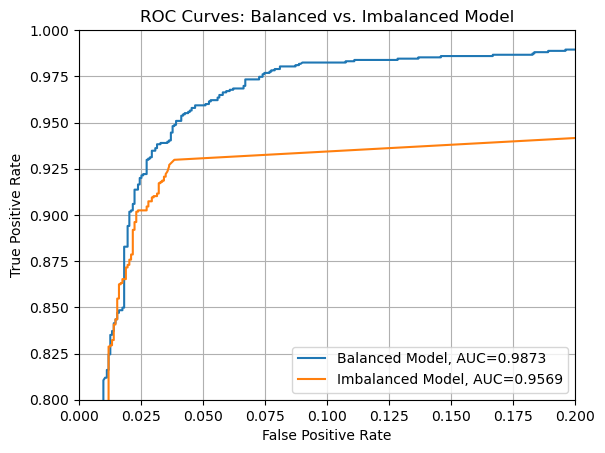

In [25]:
compare_roc_curves()
plt.xlim([0.0, 0.2])  # Zoom in on the x-axis (False Positive Rate)
plt.ylim([0.8, 1.0])  # Zoom in on the y-axis (True Positive Rate)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves: Balanced vs. Imbalanced Model")
plt.grid(True)
plt.show()


## Answer

Part 4: a    

The model trained on the balanced dataset performs significantly better, as indicated by its higher AUC score of 0.9873 compared to the imbalanced model’s AUC of 0.9569. A higher AUC indicates better performance, as it represents the model’s ability to distinguish between classes. The ROC curve for the balanced model is closer to the top-left corner, showing a higher true positive rate with a low false positive rate, which suggests it is more effective at correctly identifying positive instances without many false positives. In contrast, the imbalanced model's curve is flatter and stays farther from the top-left corner, indicating it is less accurate overall.

Part 4: b.    
 Accuracy is not the best metric for evaluating performance on an imbalanced dataset. Instead, precision and recall are more important. Recall measures how well the model identifies actual positive cases, which is crucial to avoid missing significant positives, while precision indicates how many flagged positives are truly positive, reducing false alarms. Together, precision and recall (or the F1 score, which balances both) provide a clearer picture of the model’s effectiveness in accurately identifying positive cases without too many false positives or negatives.

Part 4:c.    
To address label imbalance in a training set, some effective techniques include resampling methods like oversampling (increasing the number of examples in the minority class) and undersampling (reducing the number of examples in the majority class) to create a more balanced dataset. We can also use class weights, where the model assigns more importance to the minority class during training, helping it learn from the less common examples. Another approach is data augmentation for the minority class, where synthetic examples are generated to balance the classes.

# Q3. Logistic Regression and Softmax Classifier (10 points)



## Part 1. (5 points)

We have a dataset $\{(\mathbf{x}_1, y_1), \ldots, (\mathbf{x}_N, y_N) \}$ where $\mathbf{x}_i \in \mathbb{R}^{d}$ and $y_i \in \{1, \ldots, K\}$ for all $i$.  Suppose we have a $K$-way softmax classifier:

$$
\begin{equation}
P(y = k | \mathbf{x}; \mathbf{W}, \mathbf{b}) = \frac{\exp(\mathbf{w}_k^{\top} \mathbf{x} + b_k )}{\sum_{j=1}^{K} \exp(\mathbf{w}_j^{\top} \mathbf{x} + b_j ) }
\end{equation}
$$

where $\mathbf{w}_k \in \mathbb{R}^d$ and $b_k \in \mathbb{R}$ are the weight and bias parameters from the weight matrix and bias vector:

$$
\begin{equation}
\mathbf{W} = \begin{pmatrix}
                \mathbf{w}_1^\top \\
                \mathbf{w}_2^\top \\
                \vdots \\
                \mathbf{w}_K^\top
            \end{pmatrix}\\
\mathbf{b} = \begin{pmatrix}
                b_1 \\
                b_2 \\
                \vdots \\
                b_K
            \end{pmatrix}
\end{equation}
$$

Show that when $K=2$, this softmax classifier is equivalent to logistic regression.


## Answer

### Derivation: Softmax Classifier for K=2 as Logistic Regression

Given a dataset $\{(\mathbf{x}_1, y_1), \ldots, (\mathbf{x}_N, y_N)\}$ where $\mathbf{x}_i \in \mathbb{R}^{d}$ and $y_i \in \{1, \ldots, K\}$ for all $i$, we have a $K$-way softmax classifier defined by:

$$
P(y = k | \mathbf{x}; \mathbf{W}, \mathbf{b}) = \frac{\exp(\mathbf{w}_k^{\top} \mathbf{x} + b_k )}{\sum_{j=1}^{K} \exp(\mathbf{w}_j^{\top} \mathbf{x} + b_j )}
$$

where $\mathbf{w}_k \in \mathbb{R}^d$ and $b_k \in \mathbb{R}$ are the weight and bias parameters from the weight matrix $\mathbf{W}$ and bias vector $\mathbf{b}$:

$$
\mathbf{W} = \begin{pmatrix}
\mathbf{w}_1^\top \\
\mathbf{w}_2^\top \\
\vdots \\
\mathbf{w}_K^\top
\end{pmatrix},
\quad
\mathbf{b} = \begin{pmatrix}
b_1 \\
b_2 \\
\vdots \\
b_K
\end{pmatrix}
$$

### Simplification for $K = 2$

When $K = 2$, we have two classes, $y = 1$ and $y = 2$. The probabilities are:

1. **Probability for $y = 1$**:
$$
P(y = 1 | \mathbf{x}; \mathbf{W}, \mathbf{b}) = \frac{\exp(\mathbf{w}_1^{\top} \mathbf{x} + b_1)}{\exp(\mathbf{w}_1^{\top} \mathbf{x} + b_1) + \exp(\mathbf{w}_2^{\top} \mathbf{x} + b_2)}
$$

2. **Probability for $y = 2$**:
$$
P(y = 2 | \mathbf{x}; \mathbf{W}, \mathbf{b}) = \frac{\exp(\mathbf{w}_2^{\top} \mathbf{x} + b_2)}{\exp(\mathbf{w}_1^{\top} \mathbf{x} + b_1) + \exp(\mathbf{w}_2^{\top} \mathbf{x} + b_2)}
$$

### Simplifying $P(y = 1)$

Define:
$$
z = (\mathbf{w}_1 - \mathbf{w}_2)^{\top} \mathbf{x} + (b_1 - b_2)
$$

Then:
$$
\exp(\mathbf{w}_1^{\top} \mathbf{x} + b_1) = \exp(z) \cdot \exp(\mathbf{w}_2^{\top} \mathbf{x} + b_2)
$$

Substitute this into $P(y = 1)$:
$$
P(y = 1 | \mathbf{x}; \mathbf{W}, \mathbf{b}) = \frac{\exp(z) \cdot \exp(\mathbf{w}_2^{\top} \mathbf{x} + b_2)}{\exp(z) \cdot \exp(\mathbf{w}_2^{\top} \mathbf{x} + b_2) + \exp(\mathbf{w}_2^{\top} \mathbf{x} + b_2)}
$$

Factor out $\exp(\mathbf{w}_2^{\top} \mathbf{x} + b_2)$:
$$
P(y = 1 | \mathbf{x}; \mathbf{W}, \mathbf{b}) = \frac{\exp(z)}{\exp(z) + 1}
$$

### Equivalence to Logistic Regression

The logistic regression probability for $y = 1$ is:
$$
P(y = 1 | \mathbf{x}) = \frac{1}{1 + \exp(-z)}
$$

The derived expression matches this form:
$$
P(y = 1 | \mathbf{x}; \mathbf{W}, \mathbf{b}) = \frac{1}{1 + \exp(-z)}
$$

#### Conclusion

When $K = 2$, the softmax classifier simplifies to:
$$
P(y = 1 | \mathbf{x}; \mathbf{W}, \mathbf{b}) = \frac{1}{1 + \exp(-z)}
$$

where:
$$
z = (\mathbf{w}_1 - \mathbf{w}_2)^{\top} \mathbf{x} + (b_1 - b_2)
$$

This is exactly the form used in logistic regression, confirming that for $K = 2$, the softmax classifier is equivalent to logistic regression.


## Part 2. (5 points)

Suppose we slightly tweak the softmax classifier by adding an additional non-negative temperature parameter $T$:

$$
\begin{equation}
P(y = k | \mathbf{x}; \mathbf{W}, \mathbf{b}) = \frac{\exp((\mathbf{w}_k^{\top} \mathbf{x} + b_k ) / T)}{\sum_{j=1}^{K} \exp((\mathbf{w}_j^{\top} \mathbf{x} + b_j ) / T) }
\end{equation}
$$

(a) What will happen to the classifier output when $T \rightarrow \infty$? How about when $T \rightarrow 0$?

(b) How is this parameter useful for our model and how do we choose it?

## Answer

## a. 

#### When T approaches infinity:

- As $T$ becomes very large, the exponents in the softmax function approach 0 because dividing by a very large number results in a near-zero value:

$$
\lim_{T \to \infty} \exp\left(\frac{\mathbf{w}_k^{\top} \mathbf{x} + b_k}{T}\right) \approx 1
$$

- This results in:

$$
P(y = k | \mathbf{x}; \mathbf{W}, \mathbf{b}) = \frac{1}{K}
$$

- **Interpretation**: The classifier output becomes uniform across all classes. Each class has an equal probability of  $\frac{1}{K}$ , indicating maximum uncertainty and no preference for any specific class. The model essentially becomes uninformative.

#### When T approaches 0:

- As $T$ approaches zero, the exponents in the softmax function are scaled by a very large number, amplifying the differences between the exponentials:

$$
\lim_{T \to 0} \exp\left(\frac{\mathbf{w}_k^{\top} \mathbf{x} + b_k}{T}\right)
$$

will cause the class with the highest score $\mathbf{w}_k^{\top} \mathbf{x} + b_k$ to dominate the sum in the denominator.

- This leads to:

$$
P(y = k | \mathbf{x}; \mathbf{W}, \mathbf{b}) \approx 1 \quad \text{for the class with the highest score}
$$

and

$$
P(y = j | \mathbf{x}; \mathbf{W}, \mathbf{b}) \approx 0 \quad \text{for all other classes}
$$

- **Interpretation**: The classifier output becomes deterministic, assigning nearly all probability to the class with the highest score. This behavior indicates high confidence in the predicted class and results in a "hard" classification.

#### To summarize:

- **At T=infinity**: The classifier output becomes uniform, leading to maximum uncertainty and an uninformative model.
- **At T=0**: The classifier behaves like a hard argmax, assigning nearly all probability to the class with the highest score, resulting in a highly confident and deterministic prediction.


### b.
For classification tasks where interpretability is key, you may want a higher temperature to see how confident the model is about secondary choices.
For competitive classification accuracy, a lower temperature might be used during inference to ensure confident predictions.
Typically, the temperature is chosen through experimentation. You can set up a validation process to test different values of 𝑇 and see which setting produces the best balance of confidence and accuracy for your task.
For knowledge distillation, temperatures in the range of 𝑇 = 2 to 𝑇 = 5 are commonly used during training.

#### Choosing optimal 𝑇 value:

**Experiment with a Range:** Start by experimenting with a range of temperatures (e.g., 
𝑇 from 0.5 to 5). Observe how it affects the probability distribution output and how that correlates with your desired outcome (e.g., model accuracy, confidence)

**Task-Specific Metrics:** Use task-specific metrics to decide on 𝑇. For instance, if you are focusing on balanced confidence across classes, a higher temperature might be better.

**Cross-Validation:** Employ cross-validation techniques to systematically evaluate the performance of the model at different temperature values to find the one that yields the best results.

# Question 4 : Ensemble Methods for Classification (25 pts)

In this question, we will compare the performances of different ensemble methods for classification problems: [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html), [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) and [XGBoost](https://xgboost.readthedocs.io/en/stable/python/python_api.html) classifiers.

We will look at the [GiveMeSomeCredit](https://www.kaggle.com/c/GiveMeSomeCredit) dataset for this question. The dataset is extremely large so for this question we will only consider a subset which has been provided along with the notebook for this assignment. The dataset has already been split into train and test sets.

The task is to predict the probability that someone will experience financial distress in the next two years.

In [ ]:
# # Only use this code block if you are using Google Colab.
# # If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
# from google.colab import files

# ## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file.
# ## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
# uploaded = files.upload()

In [27]:
import pandas as pd

data = pd.read_csv('credit_data_new.csv')
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.000978,84,0,0.000240,4166.0,10,0,0,0,0.0
1,0,0.162015,59,0,0.227180,9300.0,11,0,2,0,0.0
2,0,0.211747,58,0,0.550531,6500.0,19,0,3,0,2.0
3,0,0.890781,56,0,810.000000,NaN,10,0,0,0,NaN
4,0,0.698895,59,2,0.268481,11240.0,17,0,1,0,1.0


In [29]:
from sklearn.model_selection import train_test_split
y = data['SeriousDlqin2yrs']
X = data.drop(['SeriousDlqin2yrs'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)

print('train:',X_train.shape, y_train.shape)
print('test:',X_test.shape, y_test.shape)

train: (3750, 10) (3750,)
test: (1250, 10) (1250,)


In [35]:
import matplotlib.pyplot as plt
from sklearn.model_selection import (train_test_split,GridSearchCV)
from sklearn.metrics import (accuracy_score,roc_auc_score)
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier)
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from time import time
import xgboost
%matplotlib inline

In [37]:
columns_list = list(X.columns)

a. (2.5 pts) Fit a Decision Tree Classifier with random_state = 14 for this classification problem. Report the accuracy_score and roc_auc_score on the test set.

In [39]:
def fit_classifier(clf):
  # Fit the classifier on the training set
  ### START CODE ###
  clf.fit(X_train, y_train)

  ### END CODE ###
  return clf

In [41]:
def evaluate_classifier(clf, X_test, y_test):
  # Compute the accuracy_score, and roc_auc_score on the test set
  ### START CODE ###
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

    # Compute accuracy and ROC AUC score
    acc_score = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred_proba)
  ### END CODE ###
    print("Accuracy_score: {}, ROC_AUC_score: {}".format(acc_score, auc_score))

In [43]:
print("Decision Tree")
# Initialize your decision tree classifier
### START CODE ###
dt_clf = DecisionTreeClassifier(random_state=14)

### END CODE ###

dt_clf = fit_classifier(dt_clf)
evaluate_classifier(dt_clf, X_test, y_test)

Decision Tree
Accuracy_score: 0.9072, ROC_AUC_score: 0.5988347811560307


b. (2.5 pts) Create a [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) of 25 classifiers (i.e, n_estimators=25) with random_state=14. Please use Decision Tree Classifier with random_state=14 as the base classifier. Report accuracy_score and roc_auc_score on the test data for this emsemble classifier.

In [46]:
print("Bagging of Decision Trees")
# Initialize your bagging classifier
### START CODE ###
bag_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=14),  # Use `estimator` instead of `base_estimator`
    n_estimators=25,
    random_state=14
)
### END CODE ###

bag_clf = fit_classifier(bag_clf)
evaluate_classifier(bag_clf, X_test, y_test)

Bagging of Decesion Trees
Accuracy_score: 0.932, ROC_AUC_score: 0.7752829518877382


c. (5 pts) In this question, you will fit a [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) model on the training data for this classification task.

1. First, please find the best parameters (including *n_estimators*, *max_features* and *criterion*) using [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Report the optimal parameters obtained by GridSearch.
2. Fit a model using the best parameters, and report the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) on test data.

In [49]:
def grid_search_for_classifier(clf, param_grid, X_train, y_train):
  # Grid search
  grid_search = GridSearchCV(clf, param_grid=param_grid)

  # Conduct grid search using the training set (1 line of code only)
  ### START CODE ###
  grid_search.fit(X_train, y_train)

  ### END CODE ###
  print(grid_search.best_params_)

  # Set the best paramters for your clf (1 line of code only)
  ### START CODE ###
  clf.set_params(**grid_search.best_params_)

  ### END CODE ###
  return clf

In [51]:
def train_and_evaluate_classifier(clf, X_train, y_train, X_test, y_test):
  t0 = time()
  # Fit your classifier on the training set
  ### START CODE ###
  clf.fit(X_train, y_train)

  ### END CODE ###
  print("training time", round(time()-t0, 3), "s")

  t0 = time()
  y_pred = clf.predict(X_test)
  print("predict time", round(time()-t0, 3), "s")

  print("Confusion matrix: ")
  # Print the confusion matrix computed from the test set (1 line of code only)
  ### START CODE ###
  print(confusion_matrix(y_test, y_pred))

  ### END CODE ###

  y_pred_proba = clf.predict_proba(X_test)[:,1]
  acc_score = accuracy_score(y_test, y_pred)
  auc_score = roc_auc_score(y_test, y_pred_proba)

  print("Accuracy: {}, AUC_ROC: {}".format(acc_score, auc_score))
  return clf

In [53]:
param_grid = {"n_estimators": [1, 10, 50, 100],
              "max_features": [1, 5, 10, "sqrt"],
              "criterion": ['gini','entropy'],
              "random_state": [17]}

# Initialize your random forest classifier
### START CODE ###
rf_clf = RandomForestClassifier()

### END CODE ###
rf_clf = grid_search_for_classifier(rf_clf, param_grid, X_train, y_train)
train_and_evaluate_classifier(rf_clf, X_train, y_train, X_test, y_test)

{'criterion': 'entropy', 'max_features': 1, 'n_estimators': 100, 'random_state': 17}
training time 0.141 s
predict time 0.008 s
Confusion matrix: 
[[1162    6]
 [  76    6]]
Accuracy: 0.9344, AUC_ROC: 0.7861677246909455


RandomForestClassifier(criterion='entropy', max_features=1, random_state=17)

d. (10 pts) This time, let us use [XGBoost](https://xgboost.readthedocs.io/en/stable/python/python_api.html) for the same task. Please find the best parameters (including *n_estimators, learning_rate*); fit your model using the best parameters, and report the confusion matrix and roc_auc_score on test data.

In [55]:
param_grid = {"n_estimators": [10, 100],
          "learning_rate": [0.01, 0.1, 0.5],
          "random_state": [17]
          }

In [33]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.5 MB/s eta 0:00:00ta 0:00:01


In [57]:
# Initialize your XGBoost classifier
from xgboost import XGBClassifier
### START CODE ###
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

### END CODE ###
xgb_clf = grid_search_for_classifier(xgb_clf, param_grid, X_train, y_train)
train_and_evaluate_classifier(xgb_clf, X_train, y_train, X_test, y_test)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [13:05:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [13:05:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [13:05:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [13:05:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

{'learning_rate': 0.01, 'n_estimators': 100, 'random_state': 17}
training time 0.025 s
predict time 0.001 s
Confusion matrix: 
[[1167    1]
 [  80    2]]
Accuracy: 0.9352, AUC_ROC: 0.7976528566655529


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [13:05:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [13:05:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [13:05:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=17, ...)

f. (5 pts) Compare the performance of decision tree from part a) with the ensemble methods. Briefly explain which of the three ensemble methods performed better and why?

- The single Decision Tree had the lowest performance with an accuracy of 90.72% and an ROC AUC of 0.77, showing it struggled to generalize well. 
- The ensemble methods, Random Forest and XGBoost, performed much better by combining multiple trees, which helped reduce errors and improve stability.
- Among the ensembles, XGBoost slightly outperformed Random Forest, with the highest accuracy of 93.52% and the best ROC AUC of 0.80, likely due to its advanced boosting technique that iteratively improves predictions. Thus, XGBoost provided the best overall performance for this task.

# Q5. Ensembles Descriptive Questions (10 points)
## Part 1. (5 points)

Gradient tree boosting iteratively adds regression trees into the ensemble model. In XGBoost, how are those individual trees learned and list three techniques used to prevent over-fitting. Briefly describe in your own words in less than 6 sentences. Please check Ch. 2 of this paper [XGBoost: A Scalable Tree Boosting System](https://arxiv.org/abs/1603.02754) for the details.


## Answer


In XGBoost, individual trees in the ensemble model are learned iteratively by optimizing a regularized objective function that combines a differentiable convex loss function (measuring the prediction accuracy) with a regularization term to penalize model complexity. This approach ensures that each new tree added to the ensemble focuses on correcting the residual errors of the existing model, thereby improving overall accuracy.

#### Techniques Used to Prevent Overfitting:
- **Regularized Objective:** XGBoost incorporates both L1 (Lasso) and L2 (Ridge) regularization terms to control the complexity of the trees that may overfit the training data and smooth the final learned weights.
- **Shrinkage (Learning Rate):** The learning rate scales the contribution of each tree by a factor 𝜂 after each boosting step, which helps to prevent overfitting by allowing the model to learn slowly and more robustly.
- **Column Subsampling:** This technique involves randomly selecting a subset of features for each tree, reducing model variance and enhancing generalization by preventing any single feature from dominating the model.


## Part 2. (5 points)
List **two** challenges of training mixture of experts (MoE) and briefly explain each of them in less than 3 sentences.

## Answer


Two challenges of training Mixture of Experts (MoE) are:

- **Balancing Expert Utilization:** In MoE, it's challenging to ensure all experts are utilized effectively, as the gating network may become biased toward selecting only a few experts, leading to underuse of others. This imbalance can limit the model’s diversity and generalization capabilities.

- **Training Instability:** MoE models often face instability during training due to the competition among experts, which can result in noisy gradients and convergence difficulties. This can complicate optimization and lead to suboptimal solutions if not managed properly.